In [ ]:
import sys
sys.path.append("../")

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
import torch

# Charger Iris
data = load_iris()
X = data.data      # features shape (150, 4)
y = data.target    # labels shape (150,)

# Normalisation (optionnelle mais conseillée pour les MLP)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convertir en tenseurs PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
y=torch.eye(len(y.unique()))[y]
print(y.shape)

torch.Size([150, 3])


In [6]:
from core.MLp_layer import Layer
from core.model_structure import Deep_learning_Model



In [7]:
iris_model=Deep_learning_Model(
    "adam","Crossentropy"
)
iris_model.add_layers([
Layer(X.shape[1],128,"Xaviernormal","lakyrelu"),    
Layer(128,64,"Xaviernormal","lakyrelu"),
Layer(64,5,"Xaviernormal","lakyrelu"),
Layer(5,3,None),
])

In [8]:
from utils.data_manipulation import split_data
x_train,y_train,x_test,y_test=split_data(X,y,0.7)
print(f" xtrain_shape :{x_train.shape} , x_test_shape:{x_test.shape} ytrain_shape:{y_train.shape} ytest_shape:{y_test.shape}")




 xtrain_shape :torch.Size([105, 4]) , x_test_shape:torch.Size([45, 4]) ytrain_shape:torch.Size([105, 3]) ytest_shape:torch.Size([45, 3])


In [9]:
train_losses,val_losses,accs,val_accs=iris_model.minibatch_SGD_train(100,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.001,accuracy=True)


1 | Train Loss: 0.3833 | Val Loss: 0.3672 | Train Acc: 14.58% | Val Acc: 22.22%
2 | Train Loss: 0.3714 | Val Loss: 0.3581 | Train Acc: 19.79% | Val Acc: 26.67%
3 | Train Loss: 0.3606 | Val Loss: 0.3497 | Train Acc: 30.21% | Val Acc: 40.00%
4 | Train Loss: 0.3473 | Val Loss: 0.3406 | Train Acc: 36.46% | Val Acc: 55.56%
5 | Train Loss: 0.3350 | Val Loss: 0.3318 | Train Acc: 52.08% | Val Acc: 57.78%
6 | Train Loss: 0.3235 | Val Loss: 0.3232 | Train Acc: 62.50% | Val Acc: 62.22%
7 | Train Loss: 0.3104 | Val Loss: 0.3146 | Train Acc: 69.79% | Val Acc: 73.33%
8 | Train Loss: 0.2941 | Val Loss: 0.3056 | Train Acc: 78.12% | Val Acc: 75.56%
9 | Train Loss: 0.2870 | Val Loss: 0.2972 | Train Acc: 80.21% | Val Acc: 77.78%
10 | Train Loss: 0.2670 | Val Loss: 0.2893 | Train Acc: 82.29% | Val Acc: 77.78%
11 | Train Loss: 0.2545 | Val Loss: 0.2820 | Train Acc: 82.29% | Val Acc: 80.00%
12 | Train Loss: 0.2480 | Val Loss: 0.2753 | Train Acc: 81.25% | Val Acc: 80.00%
13 | Train Loss: 0.2430 | Val Loss: 0

In [10]:
len(val_accs)

100

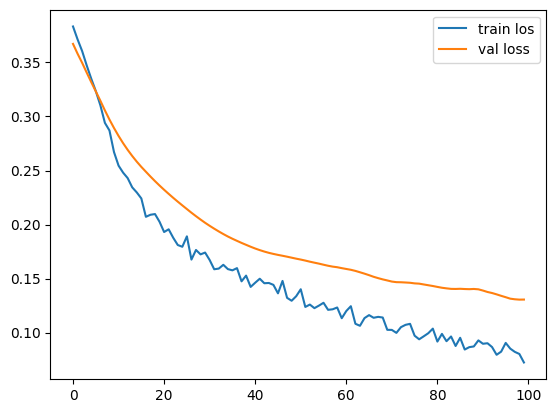

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_losses,label="train los")
plt.plot(range(100),val_losses,label="val loss")
plt.legend()

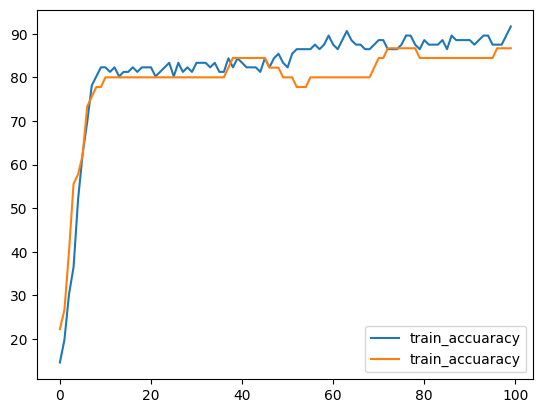

In [12]:
plt.plot(range(100),accs,label="train_accuaracy")
plt.plot(range(100),val_accs,label="train_accuaracy")
plt.legend()